In [ ]:
from numpy.random import seed 
seed(1) 
from tensorflow import set_random_seed 
set_random_seed(2)
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np



#from numpy.random import seed
#seed(1)


x_train = np.genfromtxt('/Users/ombahiwal/PycharmProjects/opencvdemo/XLS_MAT/omkar/CNN/1c 12 by 12 without pca/data6040-144/x_test.csv',delimiter=",")
y_train = np.genfromtxt('/Users/ombahiwal/PycharmProjects/opencvdemo/XLS_MAT/omkar/CNN/1c 12 by 12 without pca/data6040-144/y_train.csv',delimiter=",")

x_test = np.genfromtxt('/Users/ombahiwal/PycharmProjects/opencvdemo/XLS_MAT/omkar/CNN/1c 12 by 12 without pca/data6040-144/x_test.csv',delimiter=",")
y_test = np.genfromtxt('/Users/ombahiwal/PycharmProjects/opencvdemo/XLS_MAT/omkar/CNN/1c 12 by 12 without pca/data6040-144/y_test.csv',delimiter=",")

Using TensorFlow backend.


In [2]:
batch_size = 16 # Number of Images to send into the network for each pass 
num_classes = 3 # Total number of classes 
epochs = 7 # Total number of times the dataset has to be sent through the network
print(y_train)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.]


In [3]:
print(x_train)

[[ 1579.  1568.  1585. ...,  2628.  2543.  2697.]
 [ 1545.  1559.  1601. ...,  1979.  2078.  2032.]
 [ 1493.  1549.  1566. ...,  1418.  1427.  1810.]
 ..., 
 [ 1644.  1765.  1810. ...,  1713.  1613.  2327.]
 [ 1657.  1751.  1766. ...,  2274.  2109.  1847.]
 [ 1710.  1771.  1797. ...,  1920.  1737.  1958.]]


In [4]:
print(x_train.shape, y_train.shape)

(150, 144) (150,)


In [5]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

150 train samples
100 test samples


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 12

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

In [8]:
# Resizing the dataset into (Samples, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 1)
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)
input_shape = (img_size, img_size, 1)
input_shape

(12, 12, 1)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
import keras.backend as K
from keras.optimizers import SGD, Adam
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
dflist=[]
learning_rates=[0.01, 0.05,0.1,0.5]
for lr in learning_rates:
    K.clear_session()
    model=Sequential()
    model.add(Conv2D(25, (3,3), input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(25, (2,2)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(25, activation='relu'))  #fully connected
    model.add(Dense(25, activation='relu'))  #fully connected
    model.add(Dense(3,activation='softmax'))  #output layer
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])
    h=model.fit(x_train,y_train, batch_size=16, verbose=0)
    dflist.append(pd.DataFrame(h.history,index=h.epoch))

In [11]:
historydf= pd.concat(dflist, axis=1)

In [12]:
historydf
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 10, 10, 25)        250       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 25)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 25)          2525      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 25)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 2, 2, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
__________

In [13]:
metrics_reported=dflist[0].columns
idx=pd.MultiIndex.from_product([learning_rates, metrics_reported], names=['Learning Rates','metrics'])

historydf.columns=idx

In [14]:
historydf

Learning Rates      0.01                 0.05                 0.10            \
metrics              acc       loss       acc       loss       acc      loss   
0               0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
1               0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
2               0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
3               0.286667  11.497575  0.193333  13.001931  0.526667  7.629232   
4               0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
5               0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
6               0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
7               0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
8               0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
9               0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   

Learning Rates  0.50             
metrics          acc       loss  
0               0.28  11.605028  
1               0.28  11.605029  
2               0.28  11.605029  
3               0.28  11.605029  
4               0.28  11.605029  
5               0.28  11.605029  
6               0.28  11.605029  
7               0.28  11.605029  
8               0.28  11.605029  
9               0.28  11.605029

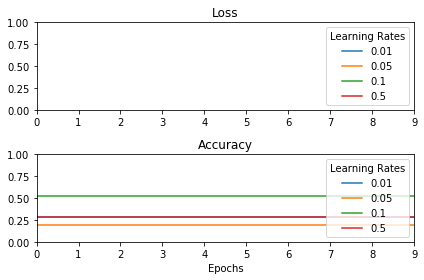

In [15]:
ax=plt.subplot(211)
historydf.xs('loss', axis=1,level='metrics').plot(ylim =(0,1), ax=ax)
plt.title("Loss")

ax=plt.subplot(212)
historydf.xs('acc', axis=1,level='metrics').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")

plt.xlabel("Epochs")

plt.tight_layout()

# Batch size


In [16]:
dflist=[]
batch_sizes=[16,32,64,128]
for batch_size in batch_sizes:
    K.clear_session()
    
    model=Sequential()
    model.add(Conv2D(25, (3,3), input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(25, (2,2)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(25, activation='relu'))  #fully connected
    model.add(Dense(25, activation='relu'))  #fully connected
    model.add(Dense(3,activation='softmax'))  #output layer
    model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01),
             metrics=['accuracy'])
    h=model.fit(x_train,y_train, batch_size=batch_size, verbose=0)
    dflist.append(pd.DataFrame(h.history,index=h.epoch)) 

In [17]:
metrics_reported=dflist[0].columns
idx=pd.MultiIndex.from_product([batch_sizes, metrics_reported], names=['batch_size','metrics'])

historydf.columns=idx

In [18]:
historydf

batch_size       16                   32                   64             \
metrics          acc       loss       acc       loss       acc      loss   
0           0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
1           0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
2           0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
3           0.286667  11.497575  0.193333  13.001931  0.526667  7.629232   
4           0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
5           0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
6           0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
7           0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
8           0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   
9           0.286667  11.497575  0.193333  13.001930  0.526667  7.629232   

batch_size   128             
metrics      acc       loss  
0           0.28  11.605028  
1           0.28  11.605029  
2           0.28  11.605029  
3           0.28  11.605029  
4           0.28  11.605029  
5           0.28  11.605029  
6           0.28  11.605029  
7           0.28  11.605029  
8           0.28  11.605029  
9           0.28  11.605029

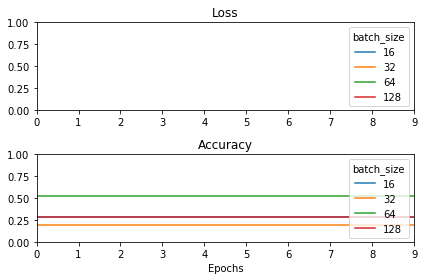

In [19]:
ax=plt.subplot(211)
historydf.xs('loss', axis=1,level='metrics').plot(ylim =(0,1), ax=ax)
plt.title("Loss")

ax=plt.subplot(212)
historydf.xs('acc', axis=1,level='metrics').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")

plt.xlabel("Epochs")

plt.tight_layout()

# Optimizer


In [20]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [21]:
dflist=[]
optimizers=['SGD(lr=0.1)',
           'SGD(lr=0.1, momentum=0.3)',
           'SGD(lr=0.1, momentum=0.3, nesterov=True)',
           'Adam(lr=0.1)',
           'Adagrad(lr=0.1)',
           'RMSprop(lr=0.1)']
for opt_name in optimizers:
    K.clear_session()
    model=Sequential()
    model.add(Conv2D(25, (3,3), input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(25, (2,2)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(25, activation='relu'))  #fully connected
    model.add(Dense(25, activation='relu'))  #fully connected
    model.add(Dense(3,activation='softmax'))  #output layer
    model.compile(loss='categorical_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h=model.fit(x_train,y_train, batch_size=64, epochs=10, verbose=0)
    dflist.append(pd.DataFrame(h.history,index=h.epoch))        

In [22]:
historydf=pd.concat(dflist,axis=1)
metrics_reported=dflist[0].columns
idx=pd.MultiIndex.from_product([optimizers, metrics_reported], names=['optimizers','metric'])

historydf.columns=idx

In [23]:
historydf

optimizers SGD(lr=0.1)            SGD(lr=0.1, momentum=0.3)            \
metric             acc       loss                       acc      loss   
0             0.233333  12.288755                      0.28  11.60503   
1             0.280000  11.605030                      0.28  11.60503   
2             0.280000  11.605030                      0.28  11.60503   
3             0.280000  11.605030                      0.28  11.60503   
4             0.280000  11.605030                      0.28  11.60503   
5             0.280000  11.605030                      0.28  11.60503   
6             0.280000  11.605030                      0.28  11.60503   
7             0.280000  11.605030                      0.28  11.60503   
8             0.280000  11.605030                      0.28  11.60503   
9             0.280000  11.605030                      0.28  11.60503   

optimizers SGD(lr=0.1, momentum=0.3, nesterov=True)           Adam(lr=0.1)  \
metric                                          acc      loss          acc   
0                                          0.526667  7.629232     0.193333   
1                                          0.526667  7.629232     0.193333   
2                                          0.526667  7.629232     0.193333   
3                                          0.526667  7.629232     0.193333   
4                                          0.526667  7.629232     0.193333   
5                                          0.526667  7.629232     0.193333   
6                                          0.526667  7.629232     0.193333   
7                                          0.526667  7.629232     0.193333   
8                                          0.526667  7.629232     0.193333   
9                                          0.526667  7.629232     0.193333   

optimizers            Adagrad(lr=0.1)            RMSprop(lr=0.1)            
metric           loss             acc       loss             acc      loss  
0           13.001932        0.193333  13.001932        0.526667  7.629232  
1           13.001932        0.193333  13.001932        0.526667  7.629232  
2           13.001932        0.193333  13.001932        0.526667  7.629232  
3           13.001932        0.193333  13.001932        0.526667  7.629232  
4           13.001932        0.193333  13.001932        0.526667  7.629232  
5           13.001932        0.193333  13.001932        0.526667  7.629232  
6           13.001932        0.193333  13.001932        0.526667  7.629232  
7           13.001932        0.193333  13.001932        0.526667  7.629232  
8           13.001932        0.193333  13.001932        0.526667  7.629232  
9           13.001932        0.193333  13.001932        0.526667  7.629232

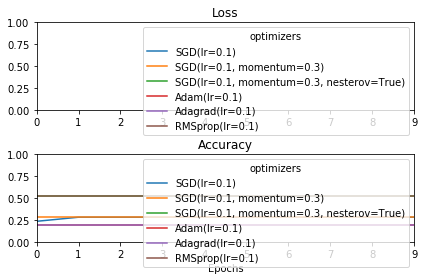

In [24]:
ax=plt.subplot(211)
historydf.xs('loss', axis=1,level='metric').plot(ylim =(0,1), ax=ax)
plt.title("Loss")

ax=plt.subplot(212)
historydf.xs('acc', axis=1,level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")

plt.xlabel("Epochs")

plt.tight_layout()

# feed forward deep NN

In [25]:
# feed forward deep neural network


from keras.optimizers import SGD, Adam, Adagrad, RMSprop

dflist=[]
optimizers=['SGD(lr=0.1)',
           'SGD(lr=0.1, momentum=0.3)',
           'SGD(lr=0.1, momentum=0.3, nesterov=True)',
           'Adam(lr=0.1)',
           'Adagrad(lr=0.1)',
           'RMSprop(lr=0.1)']
for opt_name in optimizers:
    K.clear_session()
    model=Sequential()
 
    model.add(Dense(25, activation='relu', input_shape=input_shape)) # Input Dense layer
    model.add(Dense(25, activation='relu')) # Input Dense layer
    model.add(Dense(25, activation='relu')) # Input Dense layer
    
    model.add(Flatten())
    model.add(Dense(3, activation='softmax')) # Output layer with Softmax activation function
   
    model.compile(loss='categorical_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h=model.fit(x_train,y_train, batch_size=16, epochs=10, verbose=0)
    dflist.append(pd.DataFrame(h.history,index=h.epoch))



In [26]:
historydf=pd.concat(dflist,axis=1)
metrics_reported=dflist[0].columns
idx=pd.MultiIndex.from_product([optimizers, metrics_reported], names=['optimizers','metric'])

historydf.columns=idx



In [27]:
historydf


optimizers SGD(lr=0.1)            SGD(lr=0.1, momentum=0.3)            \
metric             acc       loss                       acc      loss   
0             0.193333  13.001930                  0.520000  7.740049   
1             0.193333  13.001931                  0.526667  7.629232   
2             0.193333  13.001930                  0.526667  7.629232   
3             0.193333  13.001930                  0.526667  7.629232   
4             0.193333  13.001930                  0.526667  7.629232   
5             0.193333  13.001930                  0.526667  7.629232   
6             0.193333  13.001930                  0.526667  7.629232   
7             0.193333  13.001930                  0.526667  7.629232   
8             0.193333  13.001930                  0.526667  7.629232   
9             0.193333  13.001930                  0.526667  7.629232   

optimizers SGD(lr=0.1, momentum=0.3, nesterov=True)           Adam(lr=0.1)  \
metric                                          acc      loss          acc   
0                                          0.526667  7.629232         0.28   
1                                          0.526667  7.629232         0.28   
2                                          0.526667  7.629232         0.28   
3                                          0.526667  7.629232         0.28   
4                                          0.526667  7.629232         0.28   
5                                          0.526667  7.629232         0.28   
6                                          0.526667  7.629232         0.28   
7                                          0.526667  7.629232         0.28   
8                                          0.526667  7.629232         0.28   
9                                          0.526667  7.629232         0.28   

optimizers            Adagrad(lr=0.1)           RMSprop(lr=0.1)            
metric           loss             acc      loss             acc      loss  
0           11.605029        0.526667  7.629232        0.426667  9.228259  
1           11.605029        0.526667  7.629232        0.526667  7.629232  
2           11.605029        0.526667  7.629232        0.526667  7.629232  
3           11.605029        0.526667  7.629232        0.526667  7.629232  
4           11.605029        0.526667  7.629232        0.526667  7.629232  
5           11.605029        0.526667  7.629232        0.526667  7.629232  
6           11.605029        0.526667  7.629232        0.526667  7.629232  
7           11.605029        0.526667  7.629232        0.526667  7.629232  
8           11.605029        0.526667  7.629232        0.526667  7.629232  
9           11.605029        0.526667  7.629232        0.526667  7.629232

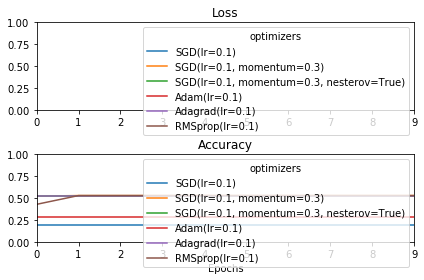

In [28]:
ax=plt.subplot(211)
historydf.xs('loss', axis=1,level='metric').plot(ylim =(0,1), ax=ax)
plt.title("Loss")

ax=plt.subplot(212)
historydf.xs('acc', axis=1,level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")

plt.xlabel("Epochs")

plt.tight_layout()